# *Algoritmos Paralelos*

## *Samuel Cadavid Zapata*

### Implementación de MapReduce para el cálculo de Promedio de Temperaturas

In [ ]:
import csv
from collections import defaultdict

def leer_datos(archivo):
    """
    Lee los datos del archivo CSV y los guarda en una lista de tuplas.
    Cada tupla contiene la ciudad, la fecha y la temperatura.
    """
    datos = []
    with open(archivo, 'r') as file:
        lector = csv.DictReader(file)  # Usar DictReader para manejar encabezados
        for fila in lector:
            pais = fila['Country']  # Usar 'Country' como proxy para la ciudad
            fecha = fila['dt']
            temperatura = fila['AverageTemperature']
            if pais and fecha and temperatura:  # Verificar que no haya valores faltantes
                datos.append((pais, fecha, float(temperatura)))
    return datos


def mapear(datos):
    """
    Crea pares clave-valor donde la clave es la ciudad y el valor es la temperatura.
    """
    pares = []
    for ciudad, fecha, temperatura in datos:
        pares.append((ciudad, temperatura))
    return pares


def intercambiar(pares):
    """
    Agrupa los pares por clave usando un diccionario.
    Las claves son las ciudades y los valores son listas de temperaturas.
    """
    grupos = defaultdict(list)
    for clave, valor in pares:
        grupos[clave].append(valor)
    return grupos


def reducir(grupos):
    """
    Calcula el promedio de temperaturas para cada ciudad.
    """
    promedios = {}
    for clave, valores in grupos.items():
        promedios[clave] = sum(valores) / len(valores)
    return promedios


def mapreduce_promedio_temperaturas(archivo):
    """
    Integra todas las fases del proceso MapReduce y devuelve los promedios de temperaturas por ciudad.
    """
    # Leer los datos
    datos = leer_datos(archivo)

    # Mapear los datos
    pares = mapear(datos)

    # Intercambiar los pares
    grupos = intercambiar(pares)

    # Reducir los grupos para obtener los promedios
    promedios = reducir(grupos)

    return promedios


if __name__ == "__main__":
    archivo = 'GlobalLandTemperaturesByCountry.csv'  # Nombre correcto del archivo
    resultados = mapreduce_promedio_temperaturas(archivo)
    for ciudad, promedio in resultados.items():
        print(f"{ciudad}: {promedio:.2f}")


*- Descripción del problema seleccionado:*
El problema planteado consiste en calcular el promedio de temperaturas para diferentes países utilizando un conjunto de datos meteorológicos globales (de un archivo que ya se tiene). Este problema es ideal para aplicar el modelo de programación MapReduce, que permite el procesamiento eficiente de grandes volúmenes de datos.

*- Explicación de la relevancia del problema en aplicaciones prácticas:*
El código nos permite calcular promedios de temperatura, lo que es fundamental para diversos estudios climatológicos y meteorológicos. A su vez permite analizar tendencias de cambio climático. 

*Fundamentos Teóricos:*
Descripción detallada

    - MapReduce: Es útil para el procesamiento y generación de grandes conjuntos de datos que puede ser paralelizado.

    - Fase Map: toma un conjunto de datos y los convierte en pares clave-valor. Cada par es procesado individualmente para generar un conjunto intermedio de pares clave-valor.

    - Fase Reduce: toma los pares clave-valor generados en la fase Map, los agrupa por clave y los reduce a un conjunto más pequeño de pares clave-valor, aplicando una función de reducción.

*Referencias bibliográficas*
Dean, J., & Ghemawat, S. (2008). MapReduce: Simplified Data Processing on Large Clusters. Communications of the ACM, 51(1), 107-113.


**Desarrollo del Código:**
*Explicación de la lógica y los pasos seguidos para la implementación del código:*
Lectura de datos:
- Se utiliza el módulo csv para leer los datos desde un archivo CSV.
*Mapeo de datos:*
- Se transforman los datos para crear pares clave-valor donde la clave es el país y el valor es la temperatura.
*Intercambio de pares:*
- Se agrupan los pares clave-valor por país utilizando un diccionario (defaultdict de listas).
*Reducción:*
- Se calcula el promedio de las temperaturas para cada país, sumando los valores y dividiéndolos por la cantidad de entradas.
*Integración del proceso MapReduce:*
- Se encapsulan todas las fases anteriores en una función que integra todo el proceso de lectura, mapeo, intercambio y reducción.

**Resultados:**

Pruebas realizadas con el conjunto de datos iniciales:
- Se realizaron pruebas utilizando el archivo GlobalLandTemperaturesByCountry.csv que contiene datos históricos de temperaturas promedio por país. Los datos y la información fueron parte la información brindada por el maestro para darle una mejor solución al problema. 
- Ejemplos de ejecución y análisis de los resultados obtenidos:
La ejecución del código produjo promedios de temperatura por país.


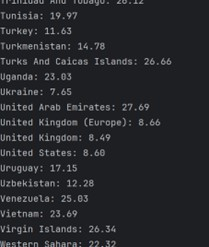 

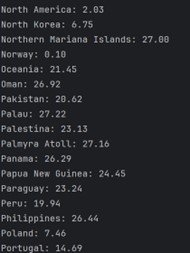 

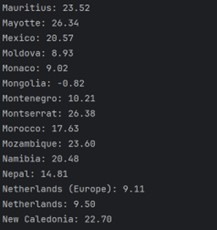

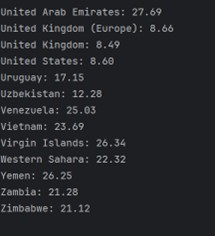

**Conclusiones:**
*Reflexión sobre la solución implementada y su eficiencia:*

Para una adecuada solución implementamos el modelo MapReduce, para calcular promedios de temperaturas demostró ser eficiente y escalable para el procesamiento de grandes volúmenes de datos (como lo es el archivo con el que se está trabajado). La separación en fases claras (map, shuffle, reduce) permitió modularizar y simplificar el desarrollo del código.

*Posibles mejoras o extensiones del trabajo realizado:*
*Optimización:* Optimizar el código para manejar datos faltantes y mejorar la eficiencia de lectura y escritura de archivos.
*Visualización:* Integrar herramientas de visualización para representar gráficamente las tendencias de temperatura por país.

Demostraciones el código funcionado: 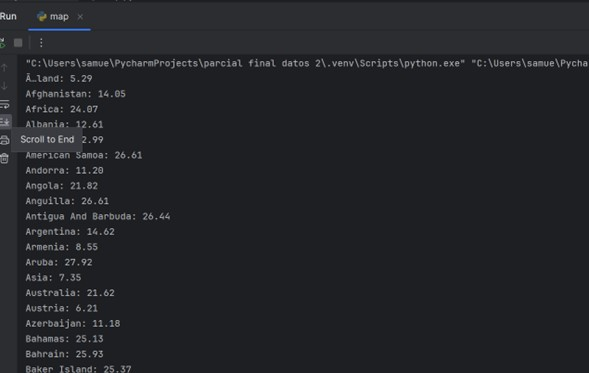


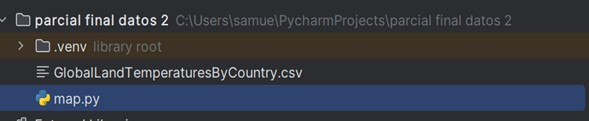

## *Jean Carlo Ardila Acevedo*

### *Algoritmo MapReduce para Contar Palabras en un Texto Grande*

In [ ]:
from collections import defaultdict
import re
import time

def leer_archivo(ruta_archivo):
    try:
        with open(ruta_archivo, 'r', encoding='utf-8') as archivo:
            return archivo.read()
    except Exception as e:
        print(f"Error al leer el archivo: {e}")
        return ""

def mapear(texto):
    # Limpiar y dividir el texto en palabras
    palabras = re.findall(r'\w+', texto.lower())
    for palabra in palabras:
        yield (palabra, 1)

def agrupar_y_ordenar(datos_mapeados):
    # Agrupar las palabras
    datos_agrupados = defaultdict(list)
    for clave, valor in datos_mapeados:
        datos_agrupados[clave].append(valor)
    return datos_agrupados

def reducir(datos_agrupados):
    datos_reducidos = {}
    for clave, valores in datos_agrupados.items():
        datos_reducidos[clave] = sum(valores)
    return datos_reducidos

def mapreduce(ruta_archivo):
    # Leer el archivo de texto
    texto = leer_archivo(ruta_archivo)
    
    if not texto:
        print("No se pudo leer el archivo.")
        return {}, []

    # Fase de mapeo
    datos_mapeados = list(mapear(texto))

    # Contar el total de palabras
    total_palabras = len(datos_mapeados)
    
    # Fase de agrupación y ordenación
    datos_agrupados = agrupar_y_ordenar(datos_mapeados)
    
    # Fase de reducción
    datos_reducidos = reducir(datos_agrupados)
    
    # Obtener las 10 palabras más utilizadas
    palabras_mas_utilizadas = sorted(datos_reducidos.items(), key=lambda item: item[1], reverse=True)[:10]
    
    return datos_reducidos, palabras_mas_utilizadas

# Uso
if __name__ == "__main__":
    ruta_archivo = 'corpus.txt'

    # Iniciar contador de tiempo
    inicio_ejecucion = time.time()

    # Ejecutar mapreduce
    conteo_palabras, palabras_mas_utilizadas = mapreduce(ruta_archivo)

    # Detener contador de tiempo
    fin_ejecucion = time.time()

    # Calcular tiempo transcurrido
    tiempo_transcurrido = fin_ejecucion - inicio_ejecucion
    
    if conteo_palabras:
        print(f"Total de palabras en el texto: {len(conteo_palabras)}")
        print("Las 10 palabras más utilizadas:")
        for palabra, conteo in palabras_mas_utilizadas:
            print(f"{palabra} : {conteo}")

    # Imprimir tiempo transcurrido
    print(f"Tiempo de ejecución: {tiempo_transcurrido} segundos.")



1. ***Descripción del problema seleccionado***:
    El problema seleccionado es el análisis de un texto para contar la frecuencia de cada palabra. Esto se logra meidante la implementación del paradigma MapReduce, que divide la tarea en pasos de mapeo, agrupación y reducción para procesar eifcientemente grandes cantidades de datos textuales.


2.  ***Explicación de la relevancia del problema en aplicaciones prácticas:***
    El conteo de palabras es una tarea fundamental en el procesamiento del lenguaje natural, análisis de textos y minería de datos. Aplicaciones prácticas incluyen motores de búsqueda, análisis de sentimientos, clasificación de textos y más. El uso de MapReduce permite manejar grandes volúmenes de datos de manera escalable y eficiente.
    
3. ***Fundamentos Teóricos:*** Descripción detallada de los conceptos teóricos:
    - *MapReduce:* Modelo de programación que permite el procesamiento paralelo de grandes conjuntos de datos. Consta de 2 fases principales: *Mapeo:* donde se procesan datos de entrada y se generan pares clave-valor; y *Reducción:* Se combinan estos pares para obtener resultados agregados.
    - *Procesamiento de texto:* Involucra técnicas de limpieza y tokenización de texto para preparar datos para análisis posteriores. En este caso, se utilizan expresiones regualres para dividir el texto en palabras.
    
4. ***Referencias bibliográficas utilizadas para comprender conceptos***:
    1. Dean, J., & Ghemawat, S. (2004). "MapReduce: Simplified Data Processing on Large Clusters". OSDI.
    2. "Natural Language Processing with Python". Steven Bird, Ewan Klein, Edward Loper. O'Reilly Media (2009). 
    3. "Regular Expressions in Python". Python Documentation. Available at: https://docs.python.org/3/library/re.html

#### *Desarrollo del Código*

- *importación de módulos:* Se importan los módulos ***'defaultdict'***, ***'re'***, ***'time'***.

- *Lectura del archivo:*
    leer_archivo(ruta_archivo): Lee el contenido de un archivo de texto y maneja posibles errores de lectura.
    
- *Fase de mapeo:*
    mapear(texto): Limpia y divide el texto en palabras, generando pares clave-valor donde la clave es la palabra y el valor es 1.
    
- *Fase de agrupación y ordenación:*
    agrupar_y_ordenar(datos_mapeados): Agrupa las palabras obtenidas en la fase de mapeo.
    
- *Fase de reducción:*
    reducir(datos_agrupados): Suma las frecuencias de las palabras agrupadas.
    
- *Función principal de MapReduce:*
    mapreduce(ruta_archivo): Coordina todo el proceso: lectura de datos, mapeo, agrupación, reducción y ordenación para obtener las 10 palabras más frecuentes.

#### *Pseudocódigo que representa la estructura del algoritmo* 

In [ ]:
Inicio
    Importar módulos necesarios
    Definir función leer_archivo(ruta_archivo)
    Definir función mapear(texto)
    Definir función agrupar_y_ordenar(datos_mapeados)
    Definir función reducir(datos_agrupados)
    Definir función mapreduce(ruta_archivo)

    Función main()
        Iniciar temporizador
        Ejecutar mapreduce
        Mostrar resultados
        Detener temporizador y mostrar tiempo de ejecución
    Fin

Ejecutar función main()
Fin


#### *Resultados*

5. Se ejecuto el código con un archivo de texto ('corpus.txt') que contiene una gran cantidad de palabras. El código realizó el conteo de palabras y se determinan las 10 palabras más frecuentes.

##### *Resultados obtenidos*

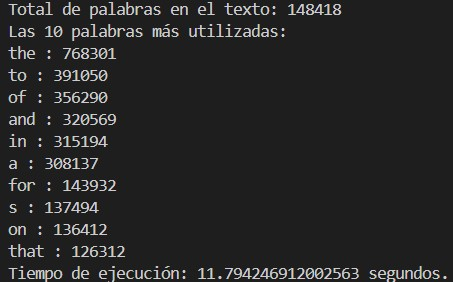

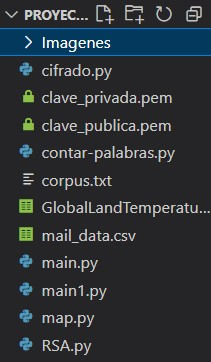

### *Conclusiones*

6. ***Reflexión sobre la solución implementada:***
    Se implementa con éxito el paradigma *MapReduce* para el conteo de palabras en un texto. La solución es eficiente para procesar textos grandes debido a la separación de tareas en fases de mapeo, agrupación y reducción, lo que facilita el procesamiento paralelo y distribuido.
    
7. ***Posibles mejores o extensión del trabajo realizado:***
    - *Distribución en múltiples nodos:* Implementar la distribución del procesamiento en múltiples nodos para manejar volúmenes de datos aún mayores.
    - *Optimización del procesamiento de texto:* Mejorar la limpieza y la tokenización del texto para manejar casos especiales como abreviaturas y palabras compuestas.
    - *Visualización de resultados:* Desarrollar herramientas de visualización para mostrar gráficamente las frecuencias de las palabras.
    - *Manejo de archivos grandes:* Optimizar la lectura y el procesamiento de archivos muy grandes dividieéndolos en fragmentos más pequeños que se procesen individualmente antes de combinarlos.

# *Algoritmos de Ciberseguridad*

## *Samuel Cadavid Zapata*

### *Implementación de un Cifrado de Sustitución Simple*

1. ***Descripción del problema seleccionado:***
    El ejercicio consiste en la implementación de un cifrado de sustitución simple y el desarrollo de un método para romper dicho cifrado utilizando análisis de frecuencia. En un cifrado de sustitución, cada letra del texto original se sustituye por otra letra del alfabeto según una clave de cifrado. La finalidad es cifrar un texto, como descifrarlo sin conocer la clave, aplicando técnicas de análisis de frecuencia para deducir las sustituciones. Además de poder manejar grandes cantidades de datos como los que se están manejando en el archivo sugerido por el maestro.
    
2. ***Explicación de la relevancia del problema en aplicaciones prácticas:***
    El estudio y la comprensión de los cifrados de sustitución son fundamentales en el campo de la criptografía, que se ocupa de proteger la información a través de técnicas de cifrado, descifrado y manejo de grandes cantidades de datos.

##### *Fundamentos Teóricos*

3. *Descripción detallada de los conceptos teóricos relacionados con el ejercicio:*
    - *El cifrado de sustitución:* Es una técnica de criptografía clásica en la cual cada letra del texto original se reemplaza por otra letra del alfabeto según una clave de cifrado. 
    - *La clave es una permutación:* Determina como se realiza la sustitución.
    - *El análisis de frecuencia:* Se utiliza para romper cifrados de sustitución. Se basa en la observación de que ciertas letras y combinaciones de letras aparecen con diferentes frecuencias. 
    
4. ***Referencias bibliográficas utilizadas para comprender los conceptos:***
    - Singh, S. (1999). The Code Book: The Science of Secrecy from Ancient Egypt to Quantum
    - Cryptography. Fourth Estate. Capítulos sobre cifrados clásicos
    - Pearson. Capítulo sobre cifrados de sustitución.


In [ ]:
import pandas as pd
import string
import collections

# Ruta al archivo CSV de correos electrónicos
data_path = 'emails.csv'

# Cargar el dataset de Enron
enron_data = pd.read_csv(data_path)

# Seleccionamos una columna de texto relevante, por ejemplo, 'message'
emails = enron_data['message'].dropna().tolist()


# Función para limpiar el texto del correo electrónico
def clean_email_text(text):
    text = text.lower()  # Convertir a minúsculas
    text = ''.join(filter(lambda x: x in string.printable, text))  # Eliminar caracteres no imprimibles
    return text


# Aplicar la limpieza a cada mensaje en el DataFrame
enron_data['clean_message'] = enron_data['message'].apply(clean_email_text)


def create_cipher_map(key):
    alphabet = string.ascii_lowercase
    key = key.lower()
    cipher_map = dict(zip(alphabet, key))
    return cipher_map


def encrypt(text, cipher_map):
    encrypted_text = []
    for char in text.lower():
        if char in cipher_map:
            encrypted_text.append(cipher_map[char])
        else:
            encrypted_text.append(char)
    return ''.join(encrypted_text)


def decrypt(encrypted_text, cipher_map):
    inverse_map = {v: k for k, v in cipher_map.items()}
    decrypted_text = []
    for char in encrypted_text:
        if char in inverse_map:
            decrypted_text.append(inverse_map[char])
        else:
            decrypted_text.append(char)
    return ''.join(decrypted_text)


def frequency_analysis(text):
    text = ''.join(filter(str.isalpha, text)).lower()
    return collections.Counter(text)


def break_cipher(encrypted_text):
    english_letter_freq = 'etaoinshrdlcumwfgypbvkjxqz'
    freq_analysis = frequency_analysis(encrypted_text)
    most_common = [pair[0] for pair in freq_analysis.most_common()]

    decryption_map = {}
    for i, char in enumerate(most_common):
        decryption_map[char] = english_letter_freq[i]

    decrypted_text = []
    for char in encrypted_text:
        if char in decryption_map:
            decrypted_text.append(decryption_map[char])
        else:
            decrypted_text.append(char)
    return ''.join(decrypted_text)


# Seleccionar un mensaje para cifrar
sample_text = enron_data['clean_message'].iloc[0]

# Crear un mapa de cifrado (puedes personalizar la clave)
cipher_key = 'phqgiumeaylnofdxjkrcvstzwb'  # Ejemplo de clave de cifrado
cipher_map = create_cipher_map(cipher_key)

# Cifrar el texto del correo electrónico
encrypted_text = encrypt(sample_text, cipher_map)
print("Texto cifrado:")
print(encrypted_text)

# Romper el cifrado utilizando análisis de frecuencia
decrypted_text = break_cipher(encrypted_text)
print("Texto descifrado (análisis de frecuencia):")
print(decrypted_text)


5. ***Desarrollo del Código***
    - *Carga del conjunto de datos:* Se carga un conjunto de datos de correos electrónicos de Enron, disponible públicamente en Kaggle, y se selecciona la columna de texto relevante.
    - *Limpieza del texto:* Se convierte el texto a minúsculas y se eliminan caracteres no alfabéticos para facilitar el análisis de frecuencia.
    - *Cifrado:* Se crea un mapa de cifrado utilizando una clave de cifrado proporcionada. Este mapa asigna cada letra del alfabeto a otra letra según la clave. Se aplica este mapa de cifrado al texto para obtener el texto cifrado.
    - *Descifrado mediante análisis de frecuencia:* Se realiza un análisis de frecuencia del texto cifrado para contar la aparición de cada letra. Donde se compara esta frecuencia con las frecuencias típicas del idioma para deducir las posibles sustituciones y reconstruir el texto original.


##### *Pseudocódigo*

In [ ]:
FUNCION cargar_datos(ruta)
    LEER archivo CSV en ruta
    RETORNAR lista de correos en la columna 'message' sin valores nulos

FUNCION limpiar_texto(texto)
    convertir a minúsculas
    eliminar caracteres no imprimibles
    mantener solo caracteres alfabéticos
    RETORNAR texto
FUNCION crear_mapa_cifrado(clave)
    alfabeto = "abcdefghijklmnopqrstuvwxyz"
    clave = convertir a minúsculas
    mapa = asignar cada letra de alfabeto a cada letra de clave
    RETORNAR mapa

FUNCION cifrar_texto(texto, mapa_cifrado)
    texto_cifrado = ""
    PARA cada caracter en texto
        SI caracter en mapa_cifrado
            añadir mapa_cifrado[caracter] a texto_cifrado
        SINO
            añadir caracter a texto_cifrado
    RETORNAR texto_cifrado

FUNCION analizar_frecuencia(texto)
    texto = filtrar solo caracteres alfabéticos y convertir a minúsculas
    contar frecuencia de cada caracter en texto
    RETORNAR diccionario de frecuencias

FUNCION romper_cifrado(texto_cifrado)
    frecuencia_ingles = "etaoinshrdlcumwfgypbvkjxqz"
    frec_cifrado = analizar_frecuencia(texto_cifrado)
    mas_comunes = caracteres más frecuentes en frec_cifrado

    mapa_descifrado = {}
    PARA i desde 0 hasta longitud de mas_comunes
        SI i < longitud de frecuencia_ingles
            mapa_descifrado[mas_comunes[i]] = frecuencia_ingles[i]

    texto_descifrado = ""
    PARA cada caracter en texto_cifrado
        SI caracter en mapa_descifrado
            añadir mapa_descifrado[caracter] a texto_descifrado
        SINO
            añadir caracter a texto_descifrado
    RETORNAR texto_descifrado

FUNCION principal()
    ruta_datos = 'emails.csv'

    correos = cargar_datos(ruta_datos)
    correos_limpios = []
    PARA cada correo en correos
        añadir limpiar_texto(correo) a correos_limpios

    texto_ejemplo = correos_limpios[0]

    clave_cifrado = 'phqgiumeaylnofdxjkrcvstzwb'
    mapa_cifrado = crear_mapa_cifrado(clave_cifrado)
    texto_cifrado = cifrar_texto(texto_ejemplo, mapa_cifrado)
    IMPRIMIR "Texto cifrado:", texto_cifrado
    texto_descifrado = romper_cifrado(texto_cifrado)
    IMPRIMIR "Texto descifrado:", texto_descifrado

# Ejecutar el programa principal
principal()


#### *Resultados*

6. ***Pruebas realizadas con el conjunto de datos iniciales:***
    - Se seleccionó un mensaje de ejemplo del conjunto de datos de correos electrónicos de Enron.
    - Se cifró el mensaje utilizando una clave de cifrado predefinida.
    - Se aplicó el análisis de frecuencia para intentar descifrar el mensaje cifrado.
    
7. ***Ejemplos de ejecución:***
    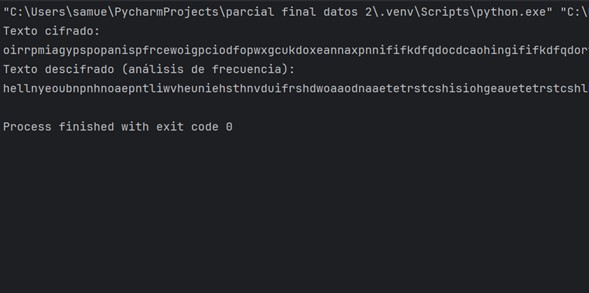


#### *Conclusiones*

8. ***Reflexión sobre la solución implementada y su eficiencia:***
    En nuestra opinión, la implementación del cifrado de sustitución y su descifrado mediante análisis de frecuencia demostró ser bastante eficaz, especialmente para textos largos, y archivos de gran volumen donde los patrones de frecuencia quizás no son tan evidentes. Esta solución no solo proporciona una comprensión sólida de los conceptos básicos sino que también destaca claramente la vulnerabilidad de los cifrados simples frente a otros métodos. 
    
9. ***Posibles mejoras o extensiones del trabajo realizado:***
    Para mejorar la eficiencia y precisión del descifrado, sería interesante considerar técnicas más avanzadas. ofrecer una mejor comprensión de los patrones al considerar combinaciones de letras en lugar de letras individuales. Además, la implementación de algoritmos de aprendizaje automático podría ser muy útil para identificar patrones de sustitución más complejos, adaptándose a diferentes tipos de cifrado de manera más efectiva.

## *Jean Carlo Ardila Acevedo*

### *Implementación del Algoritmo RSA (Cifrado Asimétrico)*

1. ***Descripción del problema seleccionado:***
    El problema seleccionado consiste en garantizar la seguridad de los mensajes de correo electrónico utilizando técnicas de criptografía. Se implementa un sistema que lee los mensajes desde un archivo CSV, que contiene los correos electrónicos que se enviaban los empleados de la empresa enron. Los cifra utilizando criptografía de clave pública RSA y luego los descifra, asegurando que solo las partes autorizadas puedan acceder al contenido de los mensajes.
   
2. ***Explicación de la relevancia del problema en aplicaciones prácticas:***
    La preocupación de los datos es una preocupación crucial en el mundo digital. El uso de la criptografía RSA para cifrar y descifrar mensajes asegura la confidencialidad y la integridad de la información, previniendo accesos no autorizados y protegiendo datos sensibles contra ataques. Esta práctica es esencial en aplicaciones como comunicaciones seguras y almacenamiento de información privada.
    
#### *Fundamentos Teóricos*

3. ***Descripción detallada de los conceptos teóricos relacionados con el ejericio:***
    - *Criptografía RSA:* RSA (Rivest-Shamir-Adleman) es un algoritmo de criptografía de clave pública ampliamente utilizado para asegurar la transmisión de los datos. Funciona mediante la generación de un par de claves: Una pública para cifrar datos y una privada para descifrar.
    - *PKCS1_OAEP:* OAEP (Optimal Asymmetric Encryption Padding) es un esquema de relleno para el cifrado RSA, que proporciona seguridad adicional contra ataques criptoanalíticos.
    
4. ***Referencias bibliográficas utilizadas para comprender los conceptos:***
    - PyCryptodome Documentation. Available at: https://www.pycryptodome.org/src/introduction 
    - CSV Module in Python Documentation. Available at: https://docs.python.org/3/library/csv.html

### *Desarollo del Código*

In [ ]:
import csv
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
import binascii
import time
import random

def guardar_clave_privada(key, filename):
    with open(filename, 'wb') as f:
        f.write(key.export_key())

def cargar_clave_privada(filename):
    with open(filename, 'rb') as f:
        return RSA.import_key(f.read())

def guardar_clave_publica(public_key, filename):
    with open(filename, 'wb') as f:
        f.write(public_key.export_key())

def cargar_clave_publica(filename):
    with open(filename, 'rb') as f:
        return RSA.import_key(f.read())

def generar_claves(bits=2048):
    key = RSA.generate(bits)
    return key, key.publickey()

def cifrar_mensaje(mensaje, clave_publica):
    cipher = PKCS1_OAEP.new(clave_publica)
    mensaje_cifrado = cipher.encrypt(mensaje.encode())
    return binascii.hexlify(mensaje_cifrado).decode('utf-8')

def descifrar_mensaje(mensaje_cifrado, clave_privada):
    cipher = PKCS1_OAEP.new(clave_privada)
    mensaje_descifrado = cipher.decrypt(binascii.unhexlify(mensaje_cifrado))
    return mensaje_descifrado.decode()

def leer_datos(archivo):
    datos = []
    with open(archivo, 'r', encoding='utf-8') as file:
        lector = csv.DictReader(file)
        for fila in lector:
            categoria = fila['Category']
            mensaje = fila['Message']
            if categoria and mensaje:
                datos.append(mensaje)
    return datos

def main():
    try:
        # Iniciar contador de tiempo
        inicio_ejecucion = time.time()

        # leer los datos del archivo
        datos_email = leer_datos(archivo)

        if not datos_email:
            print("No hay correos electrónicos para procesar.")
            return  

        # Seleccionar aleatoriamente 5 correos electrónicos
        correos_aleatorios = random.sample(datos_email, 5)

        # Generar las claves
        clave_privada, clave_publica = generar_claves()

        # Guardar las claves en archivos
        guardar_clave_privada(clave_privada, 'clave_privada.pem')
        guardar_clave_publica(clave_publica, 'clave_publica.pem')

        # Cargar las claves desde archivos
        clave_privada = cargar_clave_privada('clave_privada.pem')
        clave_publica = cargar_clave_publica('clave_publica.pem')

        # Mostrar correos leídos
        print("Correos electrónicos leídos:")
        for mensaje in correos_aleatorios:
            print(f"Mensaje: {mensaje}")
            print("-" * 80)

        # Cifrar los correos electrónicos
        correos_cifrados = [cifrar_mensaje(mensaje, clave_publica) for mensaje in correos_aleatorios]

        # Mostrar correos cifrados
        print("\nCorreos electrónicos cifrados:")
        for correo_cifrado in correos_cifrados:
            print(correo_cifrado)
            print("-" * 80)

        # Descifrar los correos electrónicos
        correos_descifrados = [descifrar_mensaje(correo_cifrado, clave_privada) for correo_cifrado in correos_cifrados]

        # Mostrar correos descifrados
        print("\nCorreos electrónicos descifrados:")
        for correo_descifrado in correos_descifrados:
            print(correo_descifrado)
            print("-" * 80)

        # Detener contador
        fin_ejecucion = time.time()

        # Calcular tiempo transcurrido
        tiempo_transcurrido = fin_ejecucion - inicio_ejecucion

        # Imprimir tiempo transcurrido
        print(f"Tiempo de ejecución: {tiempo_transcurrido} segundos.")

    except Exception as e:
        print(f"An error occurred: {e}")


archivo = r'C:\Users\jeanc\OneDrive\Documentos\Datos 2\Proyecto final\mail_data.csv'
main()


5. ***Explicación de la lógica:***
    - *Importación de los Módulos:* Importación de las bibliotecas necesarias para manejar la criptografía RSA, el manejo de archivos CSV, la codificación binaria, la medición de tiempo y la selección aleatoria.
    - *Funciones de gestión de claves:* Definición de funciones para generar, guardar y cargar claves RSA.
    - *Funciones de cifrado y descifrado:* Definición de funciones para crifrar y descrifrar mensajes usando el esquema PKCS1_OAEP.
    - *Funciones de lectura de datos:* Lectura de mensajes desde un archivo CSV.
    - *Función principal:* Coordinación de todo el proceso: lectura de datos, generación de claves, cifrado y descifrado de mensajes, y medición del tiempo de ejecución.

In [ ]:
Inicio
    Importar csv, Crypto.PublicKey.RSA, Crypto.Cipher.PKCS1_OAEP, binascii, time, random

    Función guardar_clave_privada(clave, nombre_archivo):
        Abrir archivo nombre_archivo en modo escritura binaria
        Escribir la clave privada en el archivo
        Cerrar archivo

    Función cargar_clave_privada(nombre_archivo):
        Abrir archivo nombre_archivo en modo lectura binaria
        Leer la clave privada del archivo
        Cerrar archivo
        Retornar clave privada

    Función guardar_clave_publica(clave_publica, nombre_archivo):
        Abrir archivo nombre_archivo en modo escritura binaria
        Escribir la clave pública en el archivo
        Cerrar archivo

    Función cargar_clave_publica(nombre_archivo):
        Abrir archivo nombre_archivo en modo lectura binaria
        Leer la clave pública del archivo
        Cerrar archivo
        Retornar clave pública

    Función generar_claves(bits=2048):
        Generar par de claves RSA de tamaño bits
        Retornar clave privada y clave pública

    Función cifrar_mensaje(mensaje, clave_publica):
        Crear objeto cifrador con la clave pública usando PKCS1_OAEP
        Cifrar mensaje convertido a bytes usando el objeto cifrador
        Codificar mensaje cifrado en hexadecimal
        Retornar mensaje cifrado en formato hexadecimal

    Función descifrar_mensaje(mensaje_cifrado, clave_privada):
        Crear objeto descifrador con la clave privada usando PKCS1_OAEP
        Decodificar mensaje cifrado de hexadecimal a bytes
        Descifrar mensaje usando el objeto descifrador
        Convertir mensaje descifrado a texto
        Retornar mensaje descifrado

    Función leer_datos(nombre_archivo):
        Inicializar lista datos vacía
        Abrir archivo nombre_archivo en modo lectura con codificación utf-8
        Leer contenido del archivo CSV
        Para cada fila en el archivo CSV:
            Si la categoría y el mensaje están presentes:
                Añadir mensaje a la lista datos
        Cerrar archivo
        Retornar lista datos

    Función principal main():
        Iniciar temporizador

        Leer datos del archivo CSV
        Si no hay datos en el archivo CSV:
            Imprimir mensaje de error y terminar

        Seleccionar aleatoriamente 5 mensajes de la lista de datos

        Generar claves RSA
        Guardar clave privada en 'clave_privada.pem'
        Guardar clave pública en 'clave_publica.pem'

        Cargar clave privada desde 'clave_privada.pem'
        Cargar clave pública desde 'clave_publica.pem'

        Imprimir mensajes originales seleccionados

        Inicializar lista correos_cifrados vacía
        Para cada mensaje en los mensajes seleccionados:
            Cifrar mensaje usando la clave pública
            Añadir mensaje cifrado a la lista correos_cifrados
            Imprimir mensaje cifrado

        Inicializar lista correos_descifrados vacía
        Para cada mensaje cifrado en correos_cifrados:
            Descifrar mensaje usando la clave privada
            Añadir mensaje descifrado a la lista correos_descifrados
            Imprimir mensaje descifrado

        Detener temporizador
        Calcular tiempo de ejecución
        Imprimir tiempo de ejecución

    Definir la ruta del archivo CSV con mensajes
    Ejecutar función main()

Fin


### *Resultados*

6. ***Pruebas realizadas con el conjunto de datos iniciales:***
    Se ejecuto el programa con el archivo CSV, que contiene mensajes de correo electrónicos enviados de los empleos de enron. El programa selecciona aleatoriamente 5 mensajes para cifrarlos y luego descifrarlos.
    
##### *Ejecución:*
    
    

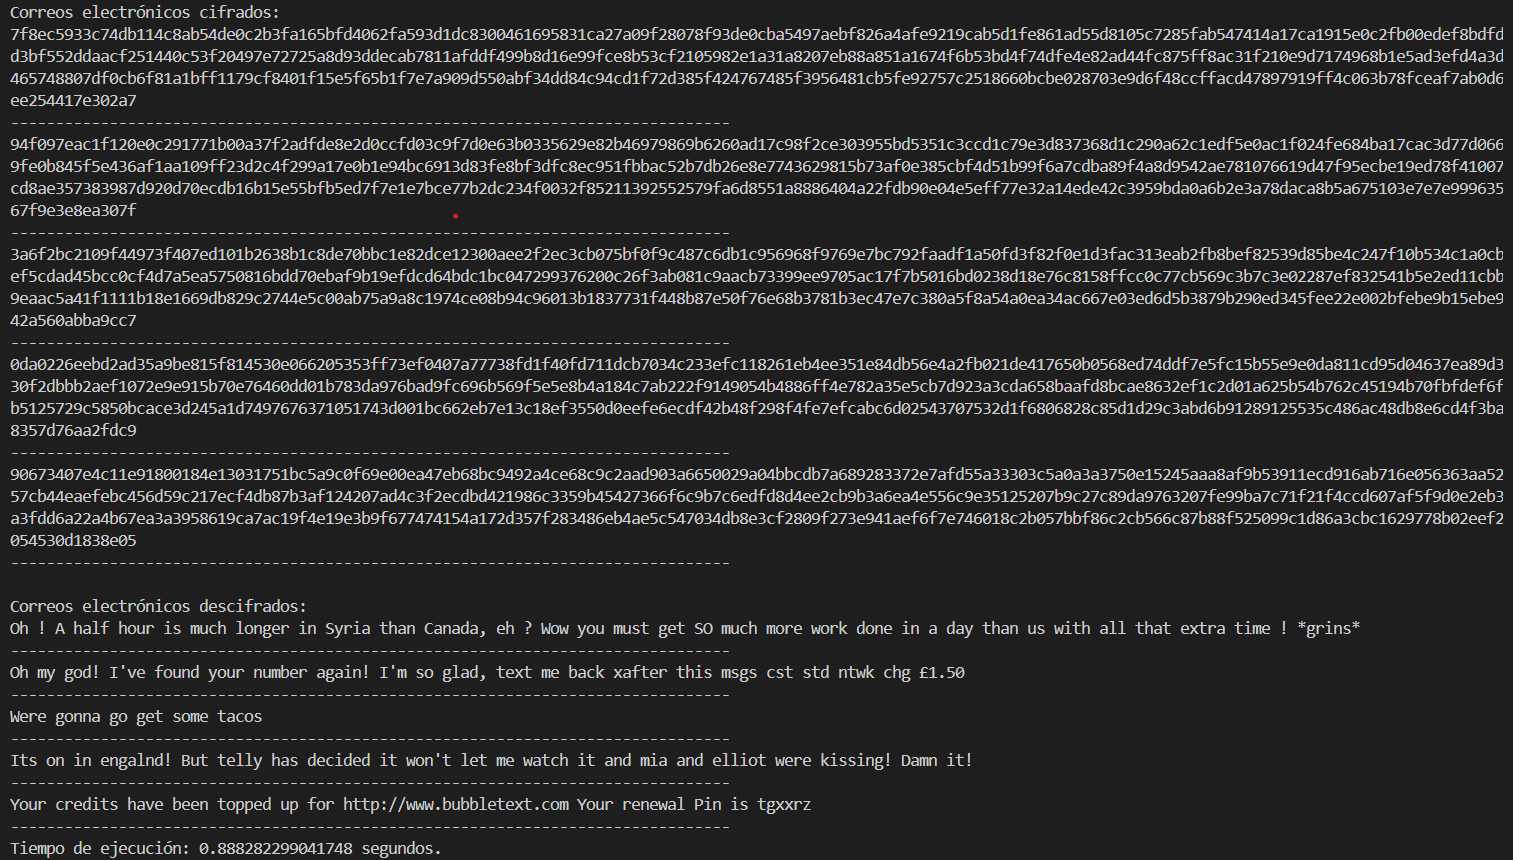

### *Conclusiones*

7. ***Reflexión sobre la solución implementada y su eficiencia:***
    El código implementa con éxito un sistema de cifrado y descifrado de mensajes utilizando criptografía RSA, asegurando qeu los mensajes solo puedan ser leídos por destinatarios autorizados. La eficiencia del proceso depende del tamaño de los mensajes y la longitud de las claves RSA, pero para el uso con mensajes cortos y claves de 2048 bits, el rendimiento es adecuado.
    
8. ***Posibles mejoras o extensiones del trabajo realizado:***
    - *Mejor manejo de errores:* Implementar una gestión de errores más robusta, para manejar posibles fallos en la lectura del archivo CSV, generación de claves y cifrado/descifrado de mensajes.
    - *Interfaz gráfica:* Desarrollar una GUI para facilitar la interacción con el programa.
    - *Soporte apra archivos adjuntos:* Extender el código para cifrar y descifrar no solo el texto de los mensajes, sino también archivos adjuntos.
    - *Paralelización:* Implementar técnicas de paralelización para mejorar la eficiencia del cifrado y descifrado de grandes volúmenes de datos.